Importing Neccessary Libraries

In [23]:
import re
import os
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
from collections import OrderedDict
from itertools import product
from parse_football_stats import parse_football_stats
from top_n_outcomes_from_folder import top_n_outcomes_from_folder

In [24]:
matches = "./Matches 19022024"

### Testing the parsing function
Parameters:
filename (`str`): The path to the `HTML file` containing football match statistics.

Returns:
`pandas.DataFrame`: A DataFrame containing parsed football match statistics, including team names, scores, odds, probabilities, and sorted by probabilities in descending order.

In [25]:
stats = parse_football_stats(f'{matches}/fcporto_arsenal.html')
stats

,Game,Team,Score,Odds,Probability
0,FC Porto vs Arsenal,Arsenal,1-0,11/2,0.181818
1,FC Porto vs Arsenal,Draw,1-1,6/1,0.166667
2,FC Porto vs Arsenal,Arsenal,2-0,13/2,0.153846
3,FC Porto vs Arsenal,Arsenal,2-1,15/2,0.133333
4,FC Porto vs Arsenal,Draw,0-0,17/2,0.117647
5,FC Porto vs Arsenal,Arsenal,3-0,11/1,0.090909
6,FC Porto vs Arsenal,FC Porto,1-0,12/1,0.083333
7,FC Porto vs Arsenal,Arsenal,3-1,14/1,0.071429
8,FC Porto vs Arsenal,Draw,2-2,16/1,0.062500
9,FC Porto vs Arsenal,FC Porto,2-1,16/1,0.062500


### Testing the Top N Outcomes function
Retrieve the `top n_outcomes` outcomes from `HTML files` in the specified directory.

Parameters:
`directory` (`str`): The path to the directory containing `HTML files` with football match statistics.
`n_outcomes` (`int`, optional): The number of top outcomes to retrieve. Defaults to 2.

Returns:
`pandas.DataFrame`: A DataFrame containing the top `n_outcomes` outcomes, including teams, scores, odds, and probabilities.

In [26]:
top_n_outcomes_from_folder(matches, 2)

,Game,Team,Score,Odds,Probability
0,FC Porto vs Arsenal,Arsenal,1-0,11/2,0.181818
1,FC Porto vs Arsenal,Draw,1-1,6/1,0.166667
2,Inter Milan vs Atletico Madrid,Inter Milan,1-0,5/1,0.200000
3,Inter Milan vs Atletico Madrid,Draw,1-1,11/2,0.181818
4,Liverpool vs Luton,Liverpool,3-0,17/2,0.117647
5,Liverpool vs Luton,Liverpool,2-0,17/2,0.117647
6,Man City vs Brentford,Man City,2-0,13/2,0.153846
7,Man City vs Brentford,Man City,3-0,7/1,0.142857
8,Napoli vs Barcelona,Draw,1-1,11/2,0.181818
9,Napoli vs Barcelona,Napoli,1-0,9/1,0.111111


### Creating a GridSearch to find the optimum bets

First lets define a search grid

In [27]:
num_outcomes = 5
df = top_n_outcomes_from_folder(matches, num_outcomes)

temp_dict = OrderedDict()
for game in df['Game'].unique():
    game_probs = []
    for i in range(len(df)):
        if df['Game'][i] == game:
            game_probs.append(df['Probability'].iloc[i:i+num_outcomes -1].tolist())
    temp_dict[game] = game_probs

param_grid = OrderedDict()
for key, value in temp_dict.items():
    param_grid[key] = [v[0] for v in value]
    
#param_grid

Now lets use an exhaustive search to find the top performing combinations

In [38]:
n = 5 # Number of top results to show
number_of_bets_correct_to_win = 6 # Set to see probabilities for different prizes

def total_probability(probabilities_list):
    total = 1
    probabilities_list = sorted(probabilities_list, reverse=True)[:number_of_bets_correct_to_win]
    for probabilities in probabilities_list:
        total *= probabilities
    return total

top_results = [] 

for params in product(*param_grid.values()):
    current_total_probability = total_probability(params)
    if len(top_results) < n or current_total_probability > min(top_results)[0]:
        top_results.append((current_total_probability, params))
        top_results.sort(reverse=True)
        top_results = top_results[:n]

print(f"Top {n} results and parameters:")
for i, (result, params) in enumerate(top_results, start=1):
    print(f"Result {i}: Total Probability = {result}, Parameters = {params}")


Top 5 results and parameters:
Result 1: Total Probability = 1.8410219973362715e-05, Parameters = (0.18181818181818182, 0.2, 0.11764705882352941, 0.15384615384615385, 0.18181818181818182, 0.15384615384615385)
Result 2: Total Probability = 1.8410219973362715e-05, Parameters = (0.18181818181818182, 0.2, 0.11764705882352941, 0.15384615384615385, 0.18181818181818182, 0.15384615384615385)
Result 3: Total Probability = 1.7095204260979663e-05, Parameters = (0.18181818181818182, 0.2, 0.11764705882352941, 0.14285714285714285, 0.18181818181818182, 0.15384615384615385)
Result 4: Total Probability = 1.7095204260979663e-05, Parameters = (0.18181818181818182, 0.2, 0.11764705882352941, 0.14285714285714285, 0.18181818181818182, 0.15384615384615385)
Result 5: Total Probability = 1.687603497558249e-05, Parameters = (0.16666666666666666, 0.2, 0.11764705882352941, 0.15384615384615385, 0.18181818181818182, 0.15384615384615385)


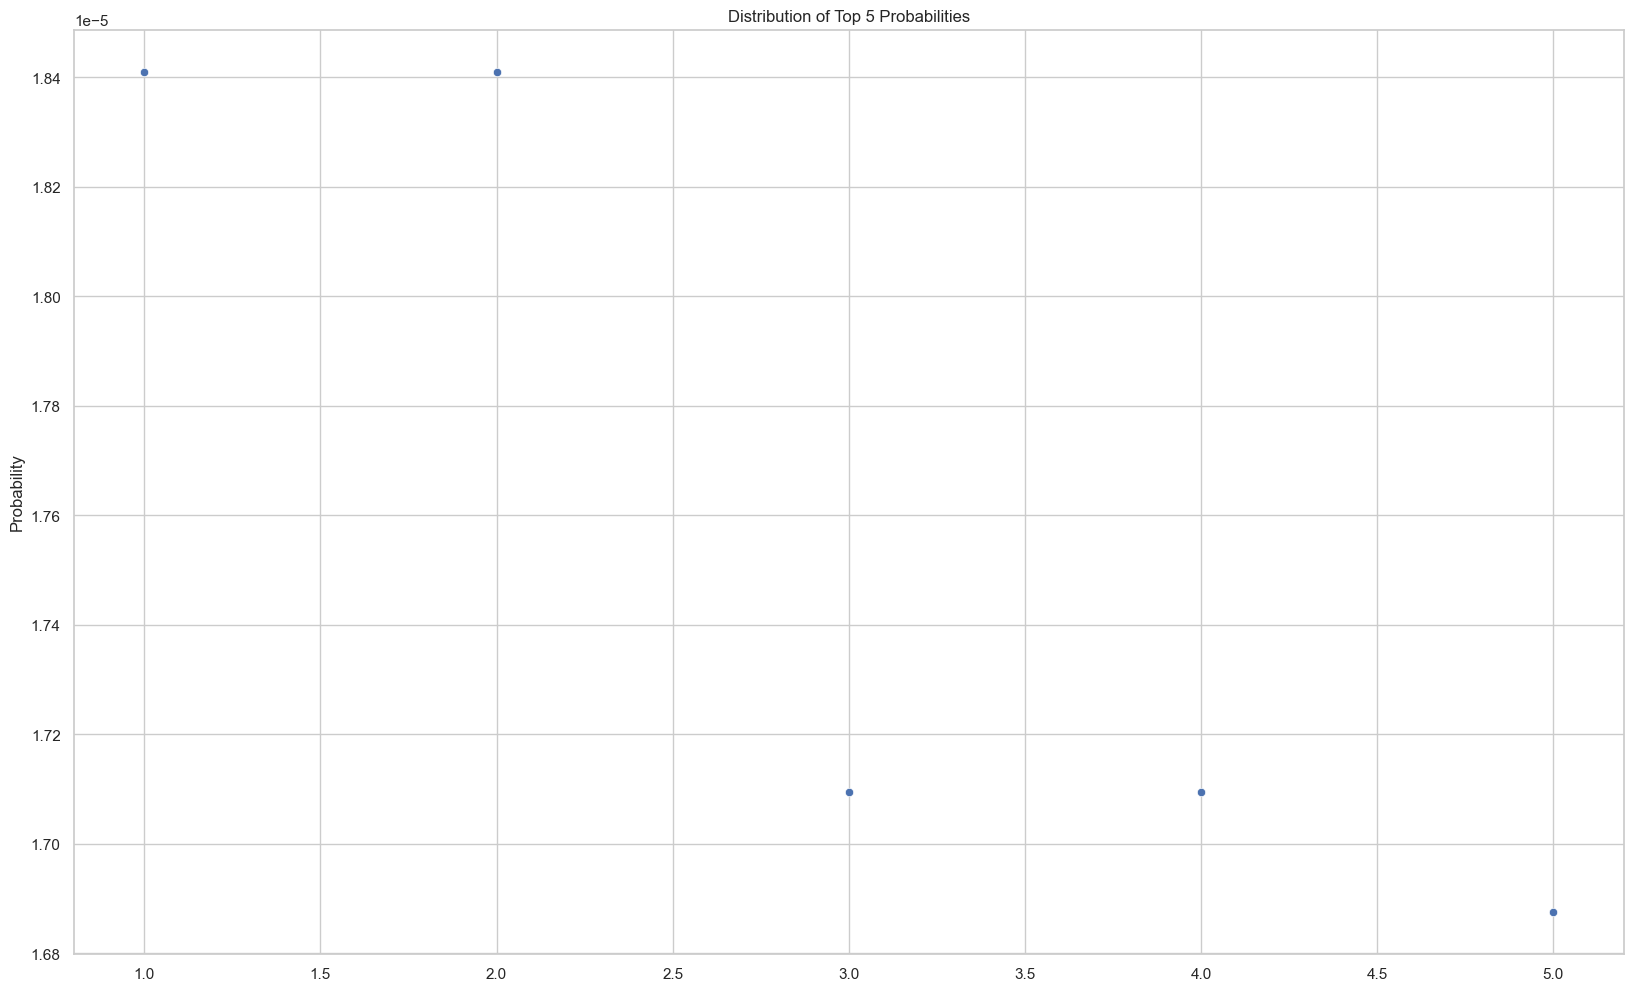

In [39]:
plt.figure(figsize=(20, 12)) 

sns.set(style="whitegrid")
# Extract probabilities from top_results
probabilities = [result for result, _ in top_results]

# Plot the probabilities using seaborn
sns.scatterplot(x=range(1, n+1), y=probabilities)
plt.title(f"Distribution of Top {n} Probabilities")
plt.ylabel("Probability")

plt.show()


Lets relate the results back to the actual bets

Note: For duplicate odds on the same match, both bets are shown

In [40]:
def bet_to_make(individual_result, df = df):    
    result, params = individual_result
    bet_df = pd.DataFrame(columns=['Game', 'Team', 'Score','Odds', 'Probability'])
    for idx, param_to_check in enumerate(params):
        matching_rows = df.loc[(df['Game'] == list(param_grid.keys())[idx]) & (df['Probability'] == param_to_check)]
        
        bet_df = pd.concat([bet_df, matching_rows],ignore_index=True)

    return bet_df, result

placement = 1 # 1 is best result, 2 is second best result, etc.
bet_df, result = bet_to_make(individual_result=top_results[placement-1])
print(f'Probability of Win {result}')
bet_df

Probability of Win 1.8410219973362715e-05


C:\Users\adamf\AppData\Local\Temp\ipykernel_9044\1021876437.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  bet_df = pd.concat([bet_df, matching_rows],ignore_index=True)


,Game,Team,Score,Odds,Probability
0,FC Porto vs Arsenal,Arsenal,1-0,11/2,0.181818
1,Inter Milan vs Atletico Madrid,Inter Milan,1-0,5/1,0.200000
2,Liverpool vs Luton,Liverpool,3-0,17/2,0.117647
3,Liverpool vs Luton,Liverpool,2-0,17/2,0.117647
4,Man City vs Brentford,Man City,2-0,13/2,0.153846
5,Napoli vs Barcelona,Draw,1-1,11/2,0.181818
6,PSV vs Borussia Dortmund,Draw,1-1,13/2,0.153846


In [41]:
total_probability = []

for i in range(1, 6):
    bet_df, result = bet_to_make(individual_result=top_results[i-1])
    print(f'Probability of Win {result}')
    total_probability.append(result)
    print(bet_df)
    print('\n\n')

print(f'Total Probability: {sum(total_probability)}')

Probability of Win 1.8410219973362715e-05
                             Game         Team Score  Odds  Probability
0             FC Porto vs Arsenal      Arsenal   1-0  11/2     0.181818
1  Inter Milan vs Atletico Madrid  Inter Milan   1-0   5/1     0.200000
2              Liverpool vs Luton    Liverpool   3-0  17/2     0.117647
3              Liverpool vs Luton    Liverpool   2-0  17/2     0.117647
4           Man City vs Brentford     Man City   2-0  13/2     0.153846
5             Napoli vs Barcelona         Draw   1-1  11/2     0.181818
6        PSV vs Borussia Dortmund         Draw   1-1  13/2     0.153846



Probability of Win 1.8410219973362715e-05
                             Game         Team Score  Odds  Probability
0             FC Porto vs Arsenal      Arsenal   1-0  11/2     0.181818
1  Inter Milan vs Atletico Madrid  Inter Milan   1-0   5/1     0.200000
2              Liverpool vs Luton    Liverpool   3-0  17/2     0.117647
3              Liverpool vs Luton    Liverpool   

C:\Users\adamf\AppData\Local\Temp\ipykernel_9044\1021876437.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  bet_df = pd.concat([bet_df, matching_rows],ignore_index=True)
C:\Users\adamf\AppData\Local\Temp\ipykernel_9044\1021876437.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  bet_df = pd.concat([bet_df, matching_rows],ignore_index=True)
C:\Users\adamf\AppData\Local\Temp\ipykernel_9044\1021876437.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is

In [42]:
print(f'Probability of Win: {result}')

Probability of Win: 1.687603497558249e-05


Overall, the odds do not appear to be great to predict all 6 results correctly but it may be better for the 3 predictions etc

3 Correct - £5,000

4 Correct - £10,000

5 Correct - £20,000

6 Correct - £250,000